**Data Science Intern @ LetsGrowMore**

**Author : Rutvi Rajesh**


**BEGINNER LEVEL TASK 01** 

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [145]:
df = pd.read_csv('iris.csv') #load the dataset

In [146]:
df.head() #print top 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [147]:
df.describe() #print statistics of all numeric columns

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [148]:
df.isnull().sum() #check for null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [149]:
df.columns #print the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [150]:
df.shape

(150, 5)

In [151]:
df.species.value_counts() #types of species -There are 3 type of species

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

**Understand the data**

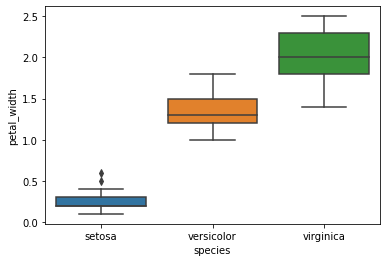

In [152]:
sns.boxplot(data=df,x="species",y="petal_width")

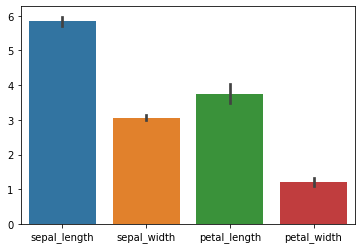

In [153]:
sns.barplot(data=df)

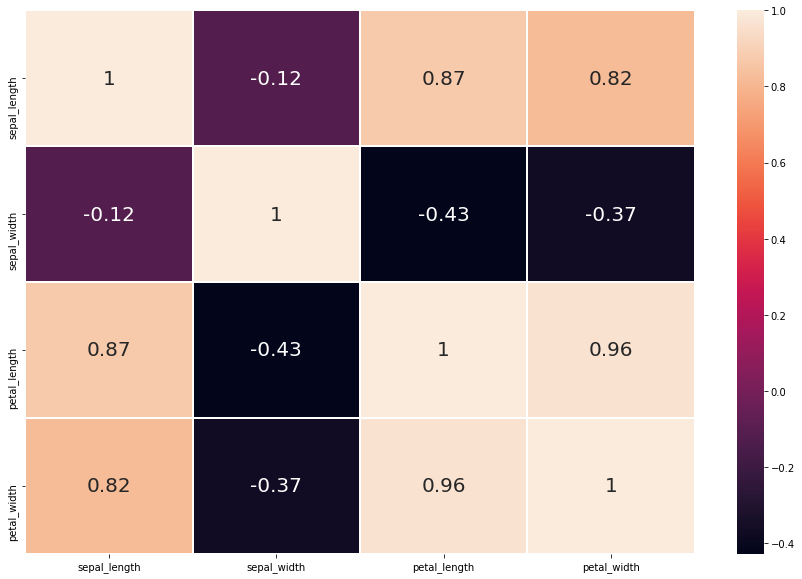

In [154]:
fig, ax = plt.subplots(figsize=(15,10)) #to set size of graph
sns.heatmap(data=df.corr(),annot=True,linewidths=1,annot_kws={'size':20},ax=ax) #to see correlation between variables you can use heatmap

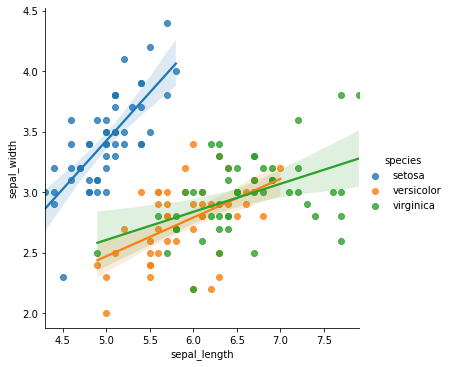

In [155]:
sns.lmplot(
    data=df,x="sepal_length", y="sepal_width", hue="species")

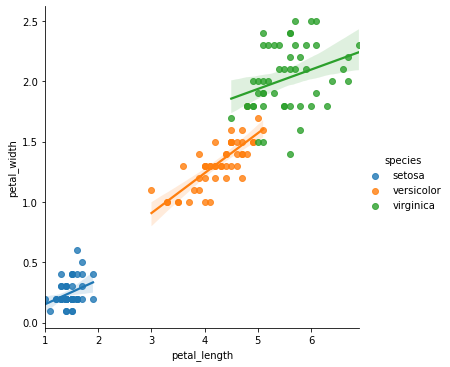

In [156]:
sns.lmplot(
    data=df,x="petal_length", y="petal_width", hue="species")

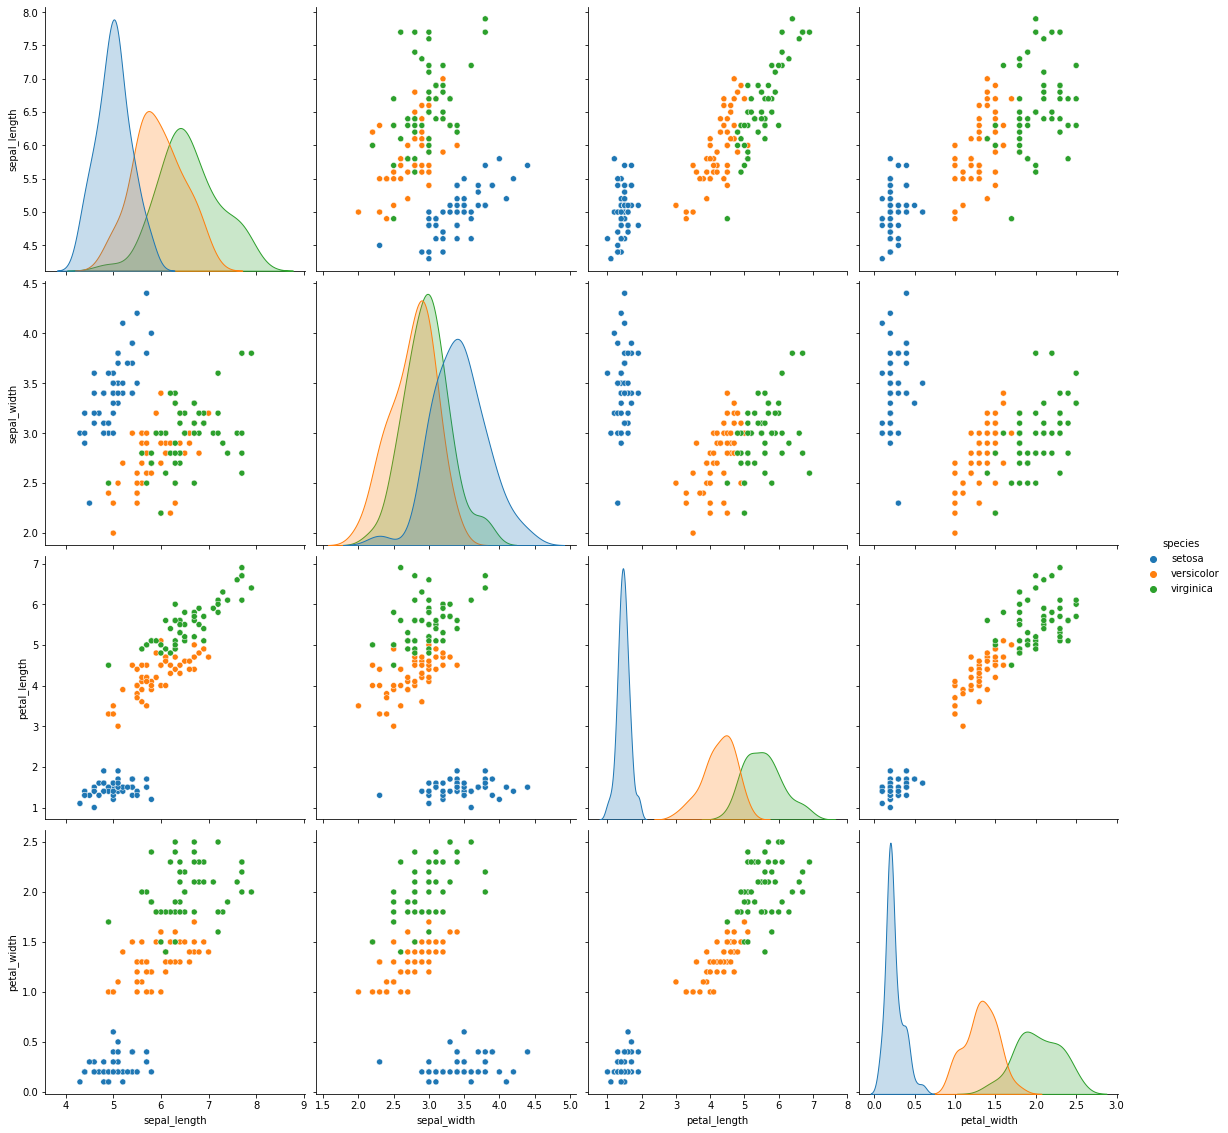

In [157]:
sns.pairplot(df, hue="species", height=4)

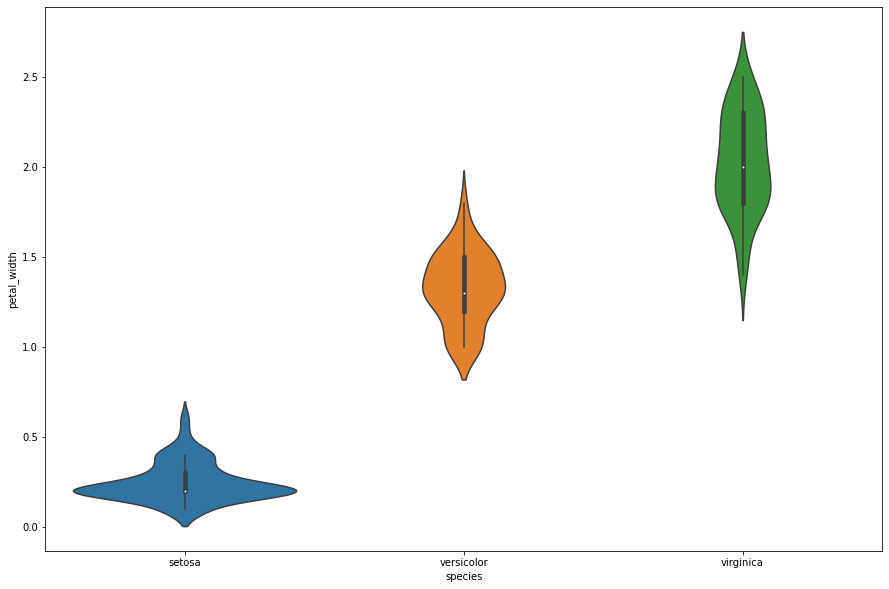

In [158]:
fig, ax = plt.subplots(figsize=(15,10)) #to set size of graph
sns.violinplot(x='species', y='petal_width', data=df,ax=ax)


In [159]:
x = df.drop(['species'],axis=1)
y=df['species']

**Split training and test data**

In [160]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=10,test_size=0.2)

In [161]:
print(x_train.shape) #shape will print number of rows and columns
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


**Build Machine Learning Model**

**Basic Decision Tree**

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
y_preddt = dtmodel.predict(x_test)
print("Accuracy of basic decision tree:",accuracy_score(y_preddt,y_test))

Accuracy of basic decision tree: 0.9333333333333333


**Improved decision tree model**

In [164]:
param = {
   'criterion' :['gini','entropy'],
   'max_depth' : [2,3,4,5,6,7,8],
   'min_samples_split' : [1,2,3],
   'max_leaf_nodes' : [1,3,4,5,7],
   'min_samples_leaf' :range(1,7)
}

In [165]:
grid = GridSearchCV(dtmodel,param_grid=param,n_jobs=-1,cv=5,return_train_score=True)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [166]:
grid.best_params_ #return best parameters that give high accuracy

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [167]:
grid.best_score_

0.95

In [168]:
dtmodel_imporvised = DecisionTreeClassifier(criterion='gini',
 max_depth=4,
 max_leaf_nodes=7,
 min_samples_leaf=3,
 min_samples_split=2)

In [169]:
dtmodel_imporvised.fit(x_train,y_train)
y_preddt_improvised =dtmodel_imporvised.predict(x_test)
print("Accuracy of imporvised decision tree:",accuracy_score(y_preddt_improvised,y_test))

Accuracy of imporvised decision tree: 1.0


**Random forest classifier**

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
print("Accuracy:",accuracy_score(y_pred_rf,y_test))

Accuracy: 0.9666666666666667


**KNN classifier**

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)

print("Accuracy:",accuracy_score(y_pred_knn,y_test))

Accuracy: 0.9666666666666667


**Compare different models**

In [171]:
#You can see that basic decision tree accuracy is 0.93 but after using hyper-parameter tuning it gives same accuracy as 100% but it is not enough as it may be overfitted 

#So you can use knn or Random forest